In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
iris=load_iris()
x=iris.data
y=iris.target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=44,stratify=y)
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
k_values=list(range(1,31))
scores=[]
x_scaled=scaler.fit_transform(x)
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    val_score=cross_val_score(knn,x_scaled,y,cv=5)
    scores.append(np.mean(val_score))

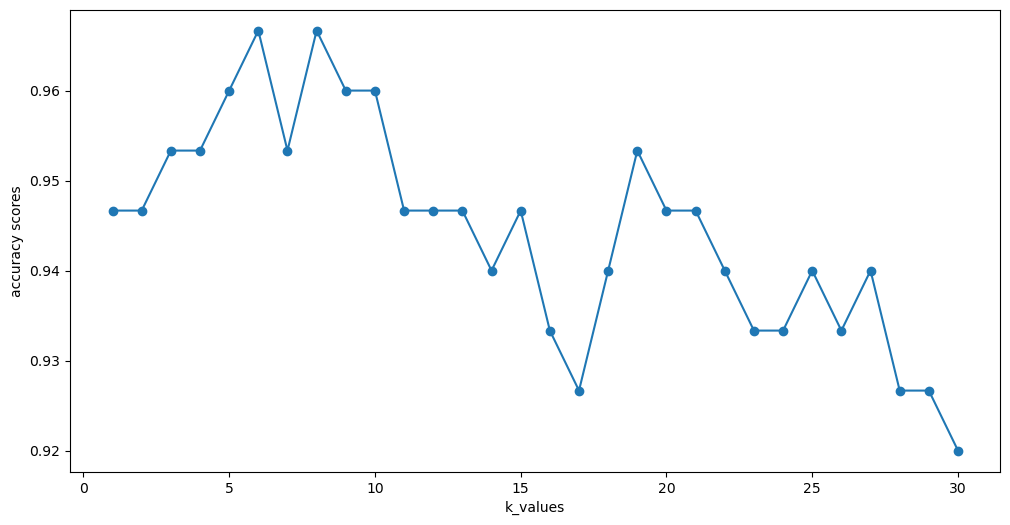

In [8]:
plt.figure(figsize=(12,6))
plt.plot(k_values,scores,marker='o')
plt.xlabel("k_values")
plt.ylabel("accuracy scores")
plt.show()

In [10]:
best_index=np.argmax(scores)
best_k=k_values[best_index]
print(f"best k values is:{best_k} and accuracy is:{scores[best_k]:.4}")

best k values is:6 and accuracy is:0.9533


In [13]:
model=KNeighborsClassifier(n_neighbors=best_k)
p=model.fit(xtrain,ytrain)
xt=p.predict(xtest)
print("accuracy score is:",accuracy_score(ytest,xt))

accuracy score is: 0.9333333333333333


In [16]:
print("correct predictions")
for i in range(len(ytest)):
    if ytest[i]==xt[i]:
        print(f"predicted value:{xt[i]} , actual values:{ytest[i]}")

correct predictions
predicted value:1 , actual values:1
predicted value:0 , actual values:0
predicted value:2 , actual values:2
predicted value:1 , actual values:1
predicted value:0 , actual values:0
predicted value:0 , actual values:0
predicted value:1 , actual values:1
predicted value:0 , actual values:0
predicted value:1 , actual values:1
predicted value:2 , actual values:2
predicted value:1 , actual values:1
predicted value:0 , actual values:0
predicted value:2 , actual values:2
predicted value:0 , actual values:0
predicted value:1 , actual values:1
predicted value:0 , actual values:0
predicted value:1 , actual values:1
predicted value:2 , actual values:2
predicted value:1 , actual values:1
predicted value:1 , actual values:1
predicted value:2 , actual values:2
predicted value:1 , actual values:1
predicted value:1 , actual values:1
predicted value:2 , actual values:2
predicted value:0 , actual values:0
predicted value:2 , actual values:2
predicted value:0 , actual values:0
predicte

In [17]:
print("incorrect predictions")
for i in range(len(ytest)):
    if ytest[i]!=xt[i]:
        print(f"predicted value:{xt[i]} , actual values:{ytest[i]}")

incorrect predictions
predicted value:1 , actual values:2
predicted value:1 , actual values:2
predicted value:1 , actual values:2


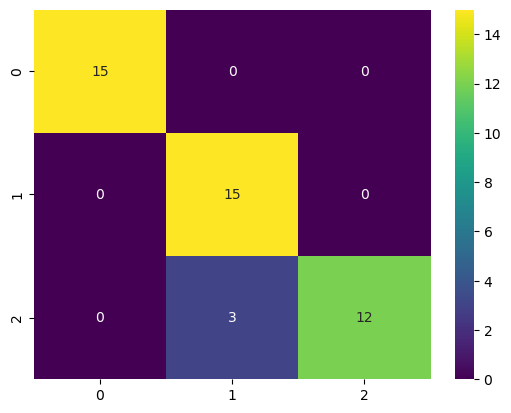

In [18]:
conf_matrix=confusion_matrix(ytest,xt)
sn.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.show()

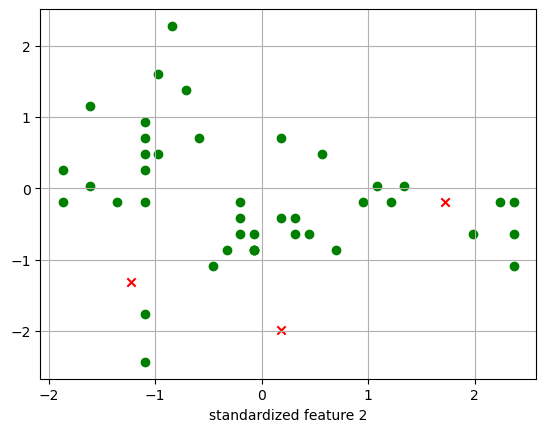

In [20]:
for i in range(len(ytest)):
    if(ytest[i]==xt[i]):
        plt.scatter(xtest[i][0],xtest[i][1],color='green',marker='o')
    else:
        plt.scatter(xtest[i][0],xtest[i][1],color='red',marker='x')
plt.xlabel("standardized feature 1")
plt.xlabel("standardized feature 2")
plt.grid(True)
plt.show()